# Proyecto Final
## Allison Lara Nieva


## Limpieza de Datos

In [48]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Base de datos
df = pd.read_csv('/content/drive/MyDrive/octavo ds/Time Series/TS_ProyectoFinal_AllisonLara/Siniestros-BasePublica.csv')
df.head()

,#,Fecha del siniestro,Entidad Federativa,Municipio,Grupo de siniestro,Tipo de siniestro
0,1,01-10-2016,Veracruz de Ignacio de la Llave,Medellín De Bravo,Grupo I. Cruces a Nivel,Arrollamiento de Vehículo
1,2,01-10-2016,Ciudad de México,Azcapotzalco,"GRUPO II. Equipo ferroviario, infraestructura ...",Rozamiento
2,3,01-10-2016,Michoacán de Ocampo,Morelia,"GRUPO II. Equipo ferroviario, infraestructura ...",Descarrilamiento
3,4,01-10-2016,Veracruz de Ignacio de la Llave,Xalapa,"GRUPO II. Equipo ferroviario, infraestructura ...",Inundación
4,5,02-10-2016,San Luis Potosí,Charcas,Grupo I. Cruces a Nivel,Arrollamiento de Vehículo


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    10250 non-null  int64 
 1   Fecha del siniestro  10250 non-null  object
 2   Entidad Federativa   10250 non-null  object
 3   Municipio            10239 non-null  object
 4   Grupo de siniestro   10250 non-null  object
 5   Tipo de siniestro    10250 non-null  object
dtypes: int64(1), object(5)
memory usage: 480.6+ KB


In [51]:
# Transformamos el tipo de dato de la columna relacionada a la fecha con el formato DD-MM-YYYY
df['Fecha del siniestro'] = pd.to_datetime(df['Fecha del siniestro'], format='%d-%m-%Y')

# Nos quedamos únicamente con las columnas relevantes para el análisis
df = df[['Fecha del siniestro', 'Entidad Federativa']]

print(df.head())
print(df.info())

  Fecha del siniestro               Entidad Federativa
0          2016-10-01  Veracruz de Ignacio de la Llave
1          2016-10-01                 Ciudad de México
2          2016-10-01              Michoacán de Ocampo
3          2016-10-01  Veracruz de Ignacio de la Llave
4          2016-10-02                  San Luis Potosí
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha del siniestro  10250 non-null  datetime64[ns]
 1   Entidad Federativa   10250 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 160.3+ KB
None


In [52]:
# Cambiamos unos nombres de estados para que no estén tan largos
df['Entidad Federativa'] = df['Entidad Federativa'].replace({
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Ciudad de México': 'CDMX',
    'Michoacán de Ocampo':'Michoacán',
    'San Luis Potosí':'SLP',
    'Coahuila de Zaragoza':'Coahuila'
})

<ipython-input-52-a36139fb1173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Entidad Federativa'] = df['Entidad Federativa'].replace({


## Análisis Exploratorio

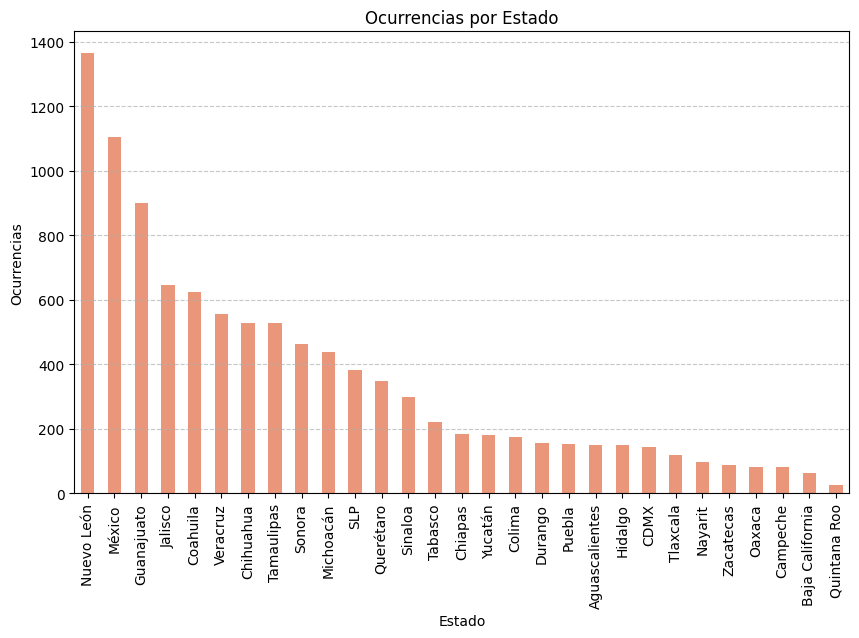

In [53]:
# Graficamos las ocurrencias por estado
plt.figure(figsize=(10, 6))
df['Entidad Federativa'].value_counts().plot(kind='bar', color='darksalmon')
plt.title('Ocurrencias por Estado')
plt.xlabel('Estado')
plt.ylabel('Ocurrencias')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
# Agrupamos por fecha y estado para hacer conteo de las ocurrencia
df_estado = df.groupby(['Fecha del siniestro', 'Entidad Federativa']).size().reset_index(name='Ocurrencias')
df_estado

,Fecha del siniestro,Entidad Federativa,Ocurrencias
0,2016-10-01,CDMX,1
1,2016-10-01,Michoacán,1
2,2016-10-01,Veracruz,2
3,2016-10-02,Michoacán,1
4,2016-10-02,SLP,1
...,...,...,...
8899,2024-04-29,Guanajuato,1
8900,2024-04-29,Jalisco,1
8901,2024-04-29,Nuevo León,1
8902,2024-04-30,Campeche,1


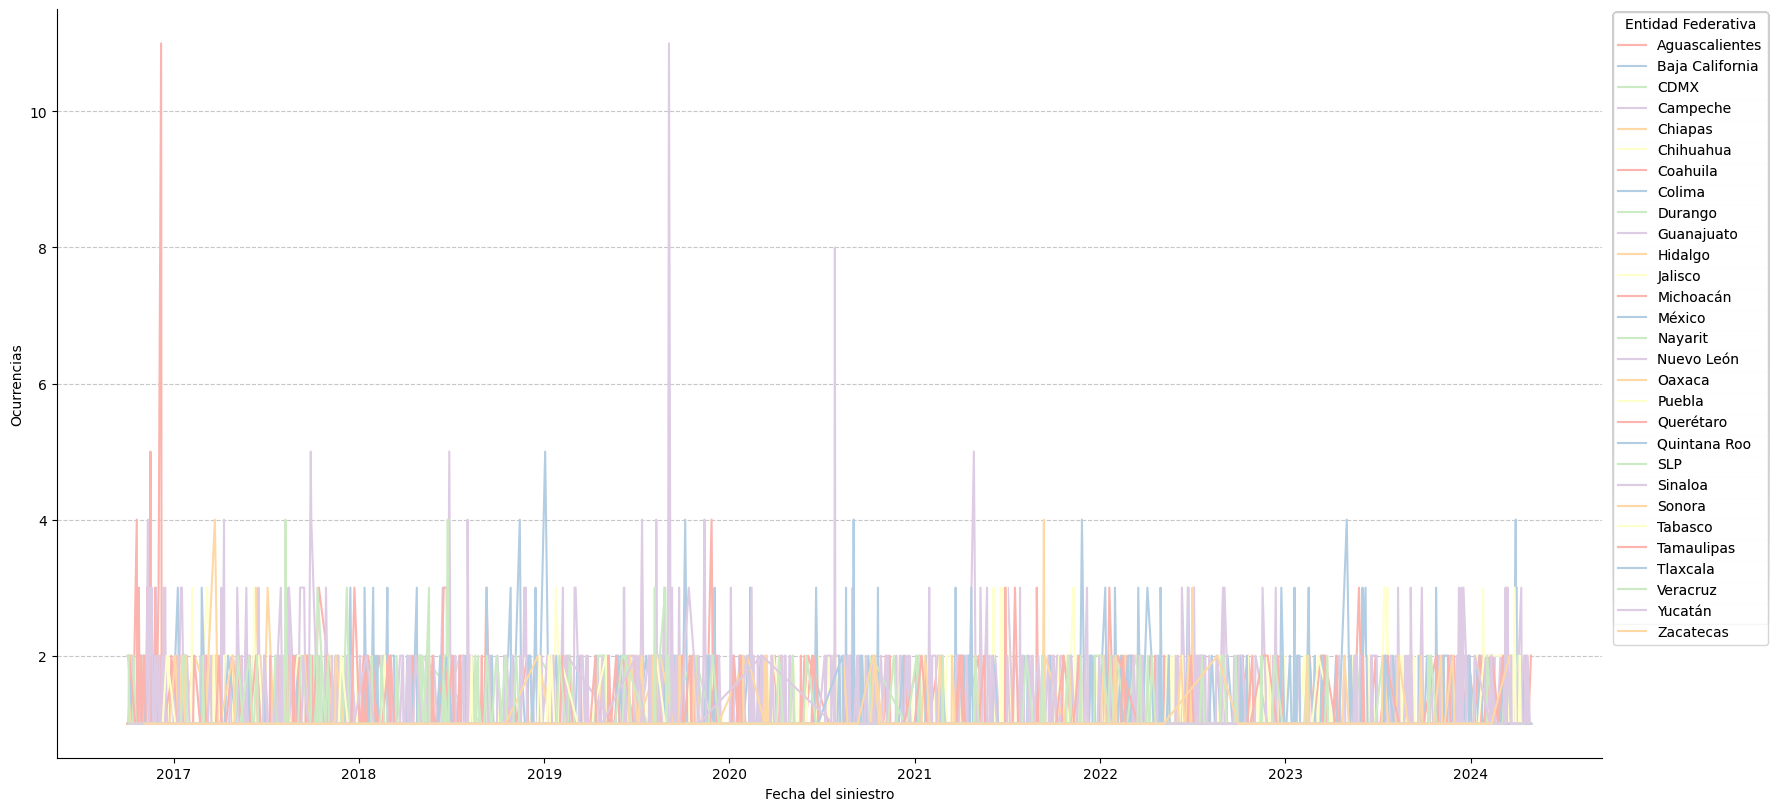

In [55]:
# Graficamos sus series de tiempo
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Pastel1'))
  xs = series['Fecha del siniestro']
  ys = series['Ocurrencias']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(16, 8), layout='constrained')
df_sorted = df_estado.sort_values('Fecha del siniestro', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Entidad Federativa')):
  _plot_series(series, series_name, i)
  fig.legend(title='Entidad Federativa', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fecha del siniestro')
plt.grid(axis='y', linestyle='--', alpha=0.7)
_ = plt.ylabel('Ocurrencias')

In [56]:
# Obtengo su información relevante
df_estado.describe()

,Fecha del siniestro,Ocurrencias
count,8904,8904.000000
mean,2020-07-13 10:18:35.902964736,1.151168
min,2016-10-01 00:00:00,1.000000
25%,2018-07-14 18:00:00,1.000000
50%,2020-08-07 00:00:00,1.000000
75%,2022-06-06 00:00:00,1.000000
max,2024-04-30 00:00:00,11.000000
std,NaN,0.448459


Dado que la mediana se comporta alrededor del 1 y más bien los casos mayores son outlier, modelaremos mejor la data del país completo.

In [57]:
# Agrupamos por fecha y estado para hacer conteo de las ocurrencia
df_full = df.groupby(['Fecha del siniestro']).size().reset_index(name='Ocurrencias')
print(df_full)
print(df_full.describe())

     Fecha del siniestro  Ocurrencias
0             2016-10-01            4
1             2016-10-02            3
2             2016-10-03            6
3             2016-10-04            7
4             2016-10-05            6
...                  ...          ...
2654          2024-04-26            4
2655          2024-04-27            5
2656          2024-04-28            2
2657          2024-04-29            5
2658          2024-04-30            2

[2659 rows x 2 columns]
                 Fecha del siniestro  Ocurrencias
count                           2659  2659.000000
mean   2020-07-17 23:04:13.177886464     3.854833
min              2016-10-01 00:00:00     1.000000
25%              2018-08-16 12:00:00     2.000000
50%              2020-07-27 00:00:00     4.000000
75%              2022-06-05 12:00:00     5.000000
max              2024-04-30 00:00:00    14.000000
std                              NaN     2.025418


In [58]:
# Creamos la serie rellenando con ceros las fechas que no aparezcan
df_full = df_full.set_index('Fecha del siniestro')
df_full = df_full.reindex(pd.date_range(start=df_full.index.min(), end=df_full.index.max(), freq='D'))
df_full = df_full.fillna(0)
df_full =df_full[['Ocurrencias']]
df_full['Ocurrencias'] = df_full['Ocurrencias'].astype(int)
df_full

,Ocurrencias
2016-10-01,4
2016-10-02,3
2016-10-03,6
2016-10-04,7
2016-10-05,6
...,...
2024-04-26,4
2024-04-27,5
2024-04-28,2
2024-04-29,5


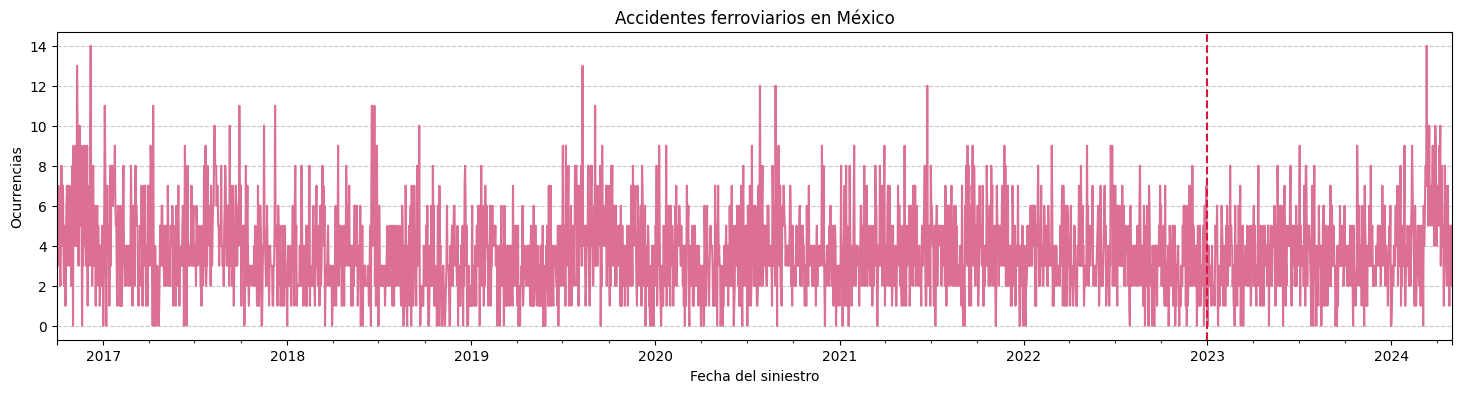

In [59]:
df_full['Ocurrencias'].plot(kind='line', figsize=(18, 4), title='Ocurrencias', color='palevioletred')
# Linea vertical punteada en 2023-01-01
plt.axvline(pd.to_datetime('2023-01-01'), linestyle='--', color='crimson')
plt.xlabel('Fecha del siniestro')
plt.ylabel('Ocurrencias')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Accidentes ferroviarios en México')
plt.show()

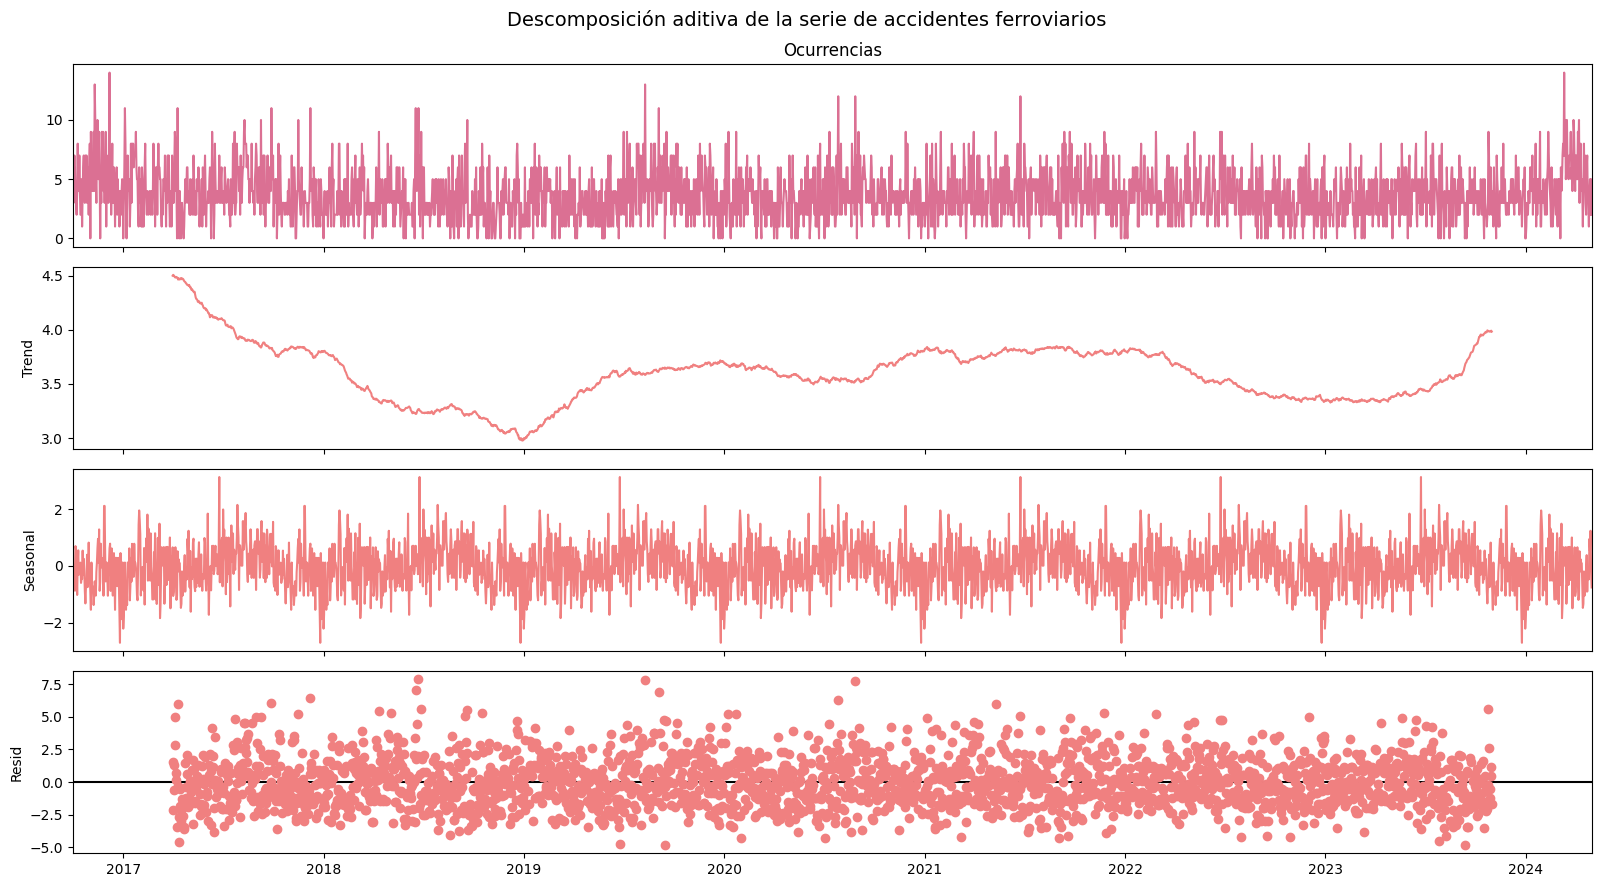

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva (suma de componentes)
decomposition = seasonal_decompose(df_full["Ocurrencias"], model='additive', period=365)

# Graficar los componentes: tendencia, estacionalidad y residuales
fig = decomposition.plot()
ax1, ax2, ax3, ax4 = fig.get_axes()
ax1.lines[0].set_color('palevioletred')
ax2.lines[0].set_color('lightcoral')
ax3.lines[0].set_color('lightcoral')
ax4.lines[0].set_color('lightcoral')

fig.set_size_inches(16, 9)
fig.suptitle("Descomposición aditiva de la serie de accidentes ferroviarios", fontsize=14)
plt.tight_layout()
plt.show()


## Ajuste del modelo

In [61]:
# Crear variable rezagada en el conjunto completo antes de dividir
df_full["Ocurrencias_lag"] = df_full["Ocurrencias"].shift(1)
df_full = df_full.fillna(0)
df_full['Ocurrencias_lag'] = df_full['Ocurrencias_lag'].astype(int)

# Redefinir conjuntos usando el nuevo DataFrame con lag
train_df = df_full[df_full.index < "2023-01-01"].dropna()
test_df = df_full[df_full.index >= "2023-01-01"].dropna()

train_size = train_df.shape[0]
test_size = test_df.shape[0]

print(train_size, test_size)
print(df_full)


2283 486
            Ocurrencias  Ocurrencias_lag
2016-10-01            4                0
2016-10-02            3                4
2016-10-03            6                3
2016-10-04            7                6
2016-10-05            6                7
...                 ...              ...
2024-04-26            4                1
2024-04-27            5                4
2024-04-28            2                5
2024-04-29            5                2
2024-04-30            2                5

[2769 rows x 2 columns]


### Poisson

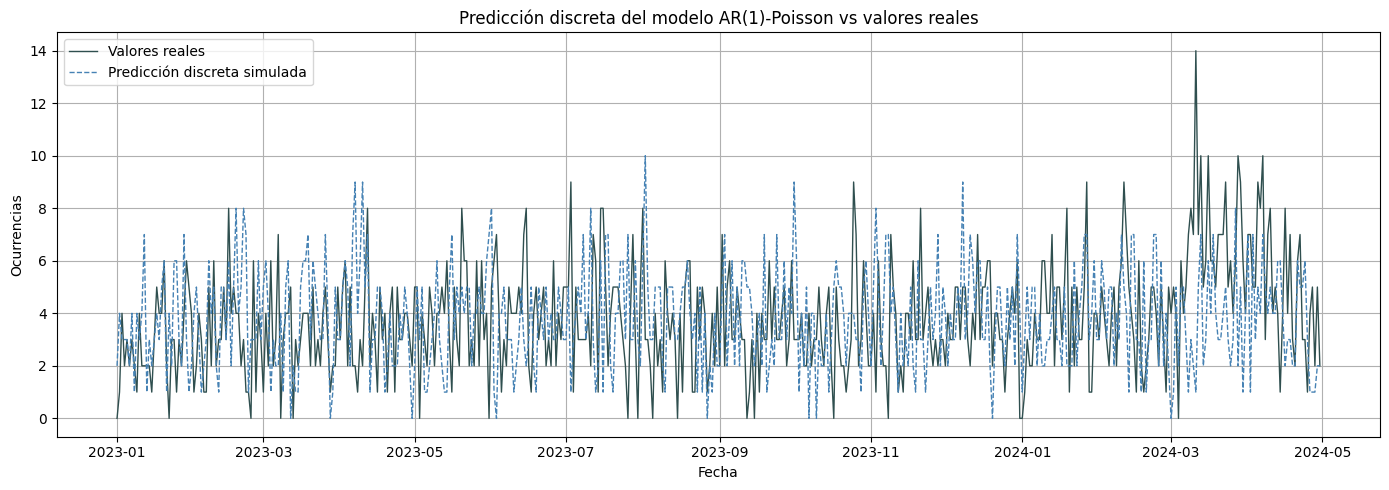

MSE: 7.728395061728395
AIC: 9744.426299967592
Tiempo de ejecución: 78.1529107093811 segundos


In [62]:
# ======================================
# MODELO AR(1)-POISSON CON ADELGAZAMIENTO BINOMIAL (DISCRETO)
# ======================================

from scipy.stats import binom, poisson
from scipy.optimize import minimize
import time

# --------------------------------------
# 1. DEFINICIÓN DEL MODELO Y VEROSIMILITUD
# --------------------------------------
# Reloj para contar el tiempo que tarda este algoritmo
start_time_poisson = time.time()

# Definimos la verosimilitud para poder calcular los parámetros
def log_likelihood_ar1_poisson_binomial(X, lam, rho):
    ll = 0
    for t in range(1, len(X)):
        ll_t = 0
        for k in range(min(X[t-1], X[t]) + 1):
            bin_pmf = binom.pmf(k, X[t-1], rho)
            pois_pmf = poisson.pmf(X[t] - k, (1 - rho) * lam)
            ll_t += bin_pmf * pois_pmf
        ll += np.log(ll_t + 1e-12)
    return ll

# Para poder minimizar
def negative_log_likelihood(params, X):
    lam, rho = params
    if lam <= 0 or not (0 <= rho <= 1):
        return np.inf
    return -log_likelihood_ar1_poisson_binomial(X, lam, rho)

# --------------------------------------
# 2. ESTIMACIÓN DE PARÁMETROS CON TRAIN
# --------------------------------------
X_train = train_df["Ocurrencias"].values

# Estimar lambda y rho
initial_guess = [1.0, 0.5]
# Optmimizador de python para minimizar
result = minimize(negative_log_likelihood, initial_guess, args=(X_train,), bounds=[(1e-3, None), (0, 1)])
lam_hat, rho_hat = result.x
log_like_final = -result.fun
aic_discreto = 2 * 2 - 2 * log_like_final  # 2 parámetros

# --------------------------------------
# 3. PREDICCIÓN DISCRETA CON SIMULACIÓN DESDE x0
# --------------------------------------

# Proceso AR(1)-Poisson con adelgazamiento binomial
def simulate_ar1_poisson_binomial_from_x0(x0, n, lam, rho, seed=42):
    np.random.seed(seed)
    X = np.zeros(n, dtype=int)
    X[0] = x0
    for t in range(1, n):
        retained = np.random.binomial(X[t-1], rho)
        innovation = np.random.poisson((1 - rho) * lam)
        X[t] = retained + innovation
    return X

# Conjunto de prueba
x0_test = train_df.iloc[-1]["Ocurrencias"]
n_test = len(test_df)
# Simulamos con los parámetros obtenidos el modelo
simulated_test_series = simulate_ar1_poisson_binomial_from_x0(x0_test, n=n_test, lam=lam_hat, rho=rho_hat)
# Guardamos resultado
test_df["AR1_Poisson_sim_func"] = simulated_test_series

# --------------------------------------
# 4. EVALUACIÓN Y GRAFICACIÓN
# --------------------------------------
# Obtenemos el mse del test y las predicciones
mse_func_based = ((test_df["Ocurrencias"] - test_df["AR1_Poisson_sim_func"])**2).mean()

# Graficamos
plt.figure(figsize=(14, 5))
plt.plot(test_df.index, test_df["Ocurrencias"], label="Valores reales", color="darkslategray", linewidth=1)
plt.plot(test_df.index, test_df["AR1_Poisson_sim_func"], label="Predicción discreta simulada", linestyle="--", color="steelblue", linewidth=1)
plt.title("Predicción discreta del modelo AR(1)-Poisson vs valores reales")
plt.xlabel("Fecha")
plt.ylabel("Ocurrencias")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dejamos de contar el tiempo
end_time_poisson = time.time()
execution_time_poisson = end_time_poisson - start_time_poisson

# Mostrar métricas
print(f"MSE: {mse_func_based}")
print(f"AIC: {aic_discreto}")
print(f"Tiempo de ejecución: {execution_time_poisson} segundos")

### Binomial Negativo

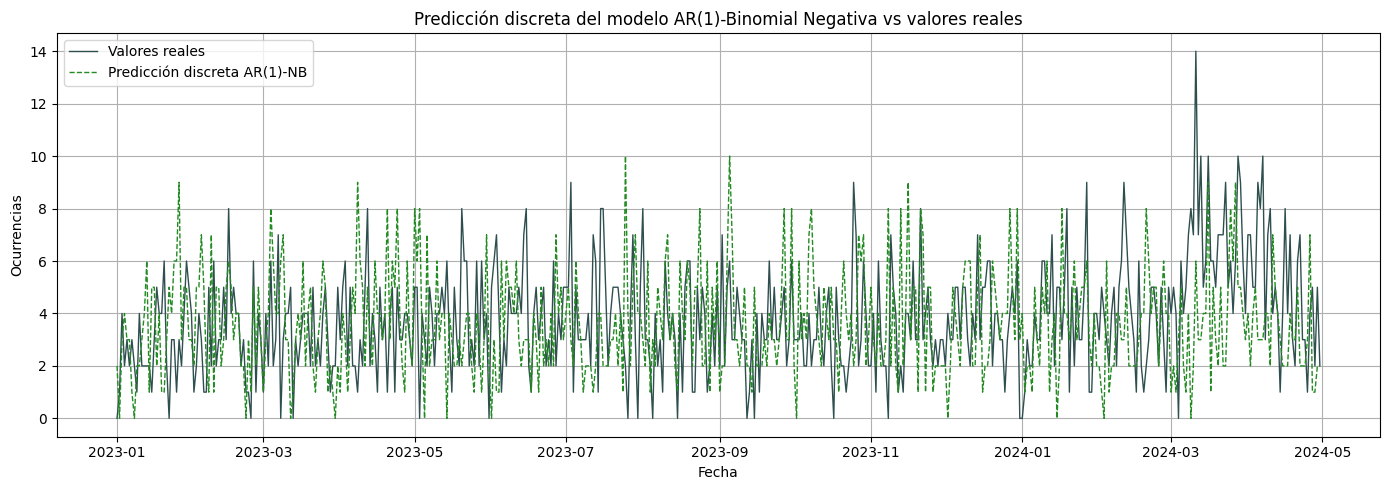

MSE: 7.81275720164609
AIC: 9695.784068492952
Tiempo de ejecución: 271.12703490257263 segundos


In [63]:
# ======================================
# MODELO AR(1)-BINOMIAL NEGATIVA CON ADELGAZAMIENTO BETA-BINOMIAL (COMPLETO)
# ======================================

from scipy.stats import beta, nbinom
from scipy.optimize import minimize
from scipy.special import betaln, gammaln

# --------------------------------------
# 1. DEFINICIÓN DEL MODELO Y VEROSIMILITUD
# --------------------------------------
# Reloj para contar el tiempo que tarda este algoritmo
start_time_nb = time.time()

# Definimos la verosimilitud para poder calcular los parámetros
def log_likelihood_ar1_nb_beta_binomial(X, lam, p, rho):
    ll = 0
    for t in range(1, len(X)):
        ll_t = 0
        x_prev, x_curr = X[t-1], X[t]
        for k in range(min(x_prev, x_curr) + 1):
            alpha = rho * lam
            beta_param = (1 - rho) * lam
            log_beta_bin_pmf = (
                betaln(k + alpha, x_prev - k + beta_param)
                - betaln(alpha, beta_param)
                + gammaln(x_prev + 1)
                - gammaln(k + 1)
                - gammaln(x_prev - k + 1)
            )
            nb_pmf = nbinom.pmf(x_curr - k, (1 - rho) * lam, p)
            ll_t += np.exp(log_beta_bin_pmf) * nb_pmf
        ll += np.log(ll_t + 1e-12)
    return ll

# Para poder minimizar
def negative_log_likelihood_nb(params, X):
    lam, p, rho = params
    if lam <= 0 or not (0 < p < 1) or not (0 <= rho <= 1):
        return np.inf
    return -log_likelihood_ar1_nb_beta_binomial(X, lam, p, rho)

# --------------------------------------
# 2. ESTIMACIÓN DE PARÁMETROS CON TRAIN
# --------------------------------------
# Estimar lambda, rho y p
X_train = train_df["Ocurrencias"].values
initial_guess = [1.0, 0.5, 0.5]
bounds = [(1e-3, None), (1e-3, 1 - 1e-3), (0, 1)]
result_nb = minimize(negative_log_likelihood_nb, initial_guess, args=(X_train,), bounds=bounds)
lambda_hat, p_hat, rho_hat = result_nb.x
log_like = -result.fun
aic = 2 * 3 - 2 * log_like

try:
    log_like_nb = -result_nb.fun
    aic_nb = 2 * 3 - 2 * log_like_nb  # 3 parámetros
except:
    log_like_nb = np.nan
    aic_nb = np.nan

# --------------------------------------
# 3. PREDICCIÓN DISCRETA CON SIMULACIÓN DESDE x0
# --------------------------------------

def simulate_ar1_nb_from_x0(x0, n, lam, p, rho, seed=42):
    np.random.seed(seed)
    X = np.zeros(n, dtype=int)
    X[0] = x0
    for t in range(1, n):
        alpha = rho * lam
        beta_param = (1 - rho) * lam
        if X[t-1] > 0:
            p_beta = beta.rvs(a=alpha, b=beta_param)
            A_t = np.random.binomial(n=int(X[t-1]), p=p_beta)
        else:
            A_t = 0
        eps_t = np.random.negative_binomial((1 - rho) * lam, p)
        X[t] = A_t + eps_t
    return X

# Simular sobre test
x0_test = train_df.iloc[-1]["Ocurrencias"]
n_test = len(test_df)
simulated_test = simulate_ar1_nb_from_x0(x0_test, n=len(test_df), lam=lambda_hat, p=p_hat, rho=rho_hat)
test_df["AR1_NB_sim_func"] = simulated_test

# --------------------------------------
# 4. EVALUACIÓN Y GRAFICACIÓN
# --------------------------------------

mse_nb = ((test_df["Ocurrencias"] - test_df["AR1_NB_sim_func"])**2).mean()

plt.figure(figsize=(14, 5))
plt.plot(test_df.index, test_df["Ocurrencias"], label="Valores reales", color="darkslategray", linewidth=1)
plt.plot(test_df.index, test_df["AR1_NB_sim_func"], label="Predicción discreta AR(1)-NB", linestyle="--", color="forestgreen", linewidth=1)
plt.title("Predicción discreta del modelo AR(1)-Binomial Negativa vs valores reales")
plt.xlabel("Fecha")
plt.ylabel("Ocurrencias")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dejamos de contar el tiempo
end_time_nb = time.time()
execution_time_nb = end_time_nb - start_time_nb

# Mostrar métricas
print(f"MSE: {mse_nb}")
print(f"AIC: {aic_nb}")
print(f"Tiempo de ejecución: {execution_time_nb} segundos")

### Gaussiano

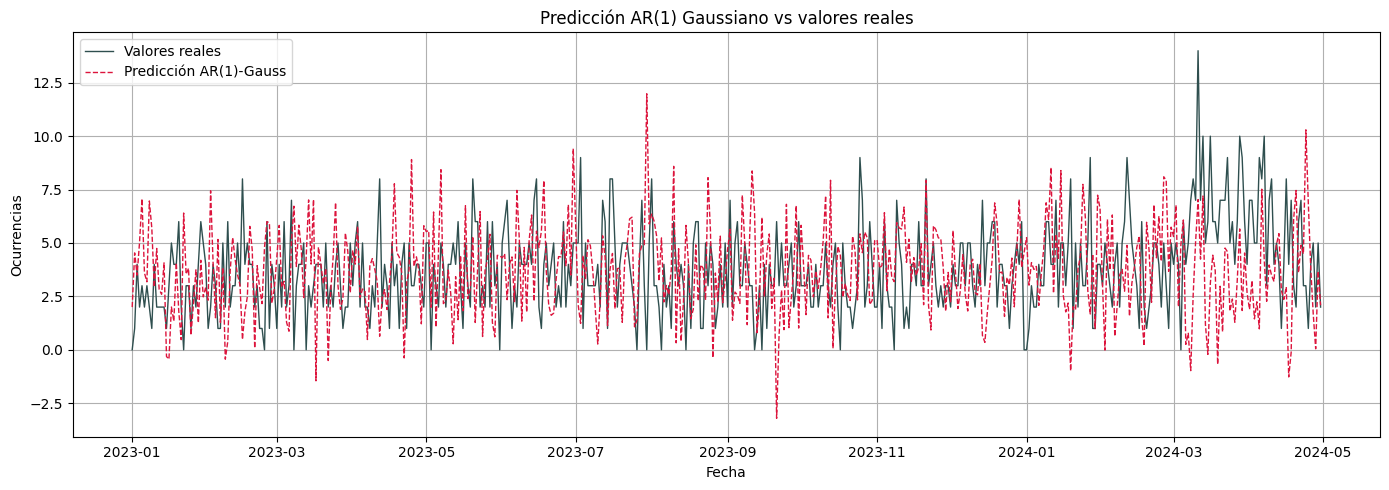

MSE: 8.97534605569627
AIC: 9905.127516333885
Tiempo de ejecución: 13.464521884918213 segundos


In [64]:
# ======================================
# MODELO AR(1) CLÁSICO CON RUIDO GAUSSIANO (IMPLEMENTACIÓN PROPIA)
# ======================================

from scipy.stats import norm

# --------------------------------------
# 1. DEFINICIÓN DEL MODELO Y VEROSIMILITUD
# --------------------------------------
# Reloj
start_time_gauss = time.time()

def log_likelihood_ar1_gaussian(X, mu, sigma, rho):
    n = len(X)
    ll = norm.logpdf(X[0], loc=mu, scale=sigma)  # marginal inicial
    for t in range(1, n):
        mean_t = mu + rho * (X[t-1] - mu)
        ll += norm.logpdf(X[t], loc=mean_t, scale=sigma)
    return ll

def negative_log_likelihood_gaussian(params, X):
    mu, sigma, rho = params
    if sigma <= 0 or not (-1 <= rho <= 1):
        return np.inf
    return -log_likelihood_ar1_gaussian(X, mu, sigma, rho)

# --------------------------------------
# 2. ESTIMACIÓN DE PARÁMETROS CON TRAIN
# --------------------------------------

X_train_ar = train_df["Ocurrencias"].values
initial_guess_gauss = [np.mean(X_train_ar), np.std(X_train_ar), 0.5]
bounds_gauss = [(None, None), (1e-3, None), (-1, 1)]

result_gauss = minimize(negative_log_likelihood_gaussian, initial_guess_gauss, args=(X_train_ar,), bounds=bounds_gauss)
mu_hat, sigma_hat, rho_hat = result_gauss.x
log_like_gauss = -result_gauss.fun
aic_gauss = 2 * 3 - 2 * log_like_gauss

# --------------------------------------
# 3. PREDICCIÓN DISCRETA CON SIMULACIÓN
# --------------------------------------

def simulate_ar1_gaussian(x0, n, mu, sigma, rho, seed=42):
    np.random.seed(seed)
    X = np.zeros(n)
    X[0] = x0
    for t in range(1, n):
        X[t] = mu + rho * (X[t-1] - mu) + np.random.normal(0, sigma)
    return X

x0_gauss = X_train_ar[-1]
n_test = len(test_df)
simulated_test_gauss = simulate_ar1_gaussian(x0_gauss, n=n_test, mu=mu_hat, sigma=sigma_hat, rho=rho_hat)
test_df["AR1_Gauss"] = simulated_test_gauss

# --------------------------------------
# 4. EVALUACIÓN Y GRAFICACIÓN
# --------------------------------------

mse_gauss = ((test_df["Ocurrencias"] - test_df["AR1_Gauss"])**2).mean()

plt.figure(figsize=(14, 5))
plt.plot(test_df.index, test_df["Ocurrencias"], label="Valores reales", color="darkslategray", linewidth=1)
plt.plot(test_df.index, test_df["AR1_Gauss"], label="Predicción AR(1)-Gauss", linestyle="--", color="crimson", linewidth=1)
plt.title("Predicción AR(1) Gaussiano vs valores reales")
plt.xlabel("Fecha")
plt.ylabel("Ocurrencias")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dejamos de contar el tiempo
end_time_gauss = time.time()
execution_time_gauss = end_time_gauss - start_time_gauss

# Mostrar métricas
print(f"MSE: {mse_gauss}")
print(f"AIC: {aic_gauss}")
print(f"Tiempo de ejecución: {execution_time_gauss} segundos")

## Comparación de Resultados

In [65]:
# Dataframe de comparación de resultados
results_df = pd.DataFrame({
    'Modelo': ['AR(1)-Poisson', 'AR(1)-NB', 'AR(1)-Gauss'],
    'MSE': [mse_func_based, mse_nb, mse_gauss],
    'AIC': [aic_discreto, aic_nb, aic_gauss],
    'Tiempo de ejecución': [execution_time_poisson, execution_time_nb, execution_time_gauss]
})
results_df

,Modelo,MSE,AIC,Tiempo de ejecución
0,AR(1)-Poisson,7.728395,9744.426300,78.152911
1,AR(1)-NB,7.812757,9695.784068,271.127035
2,AR(1)-Gauss,8.975346,9905.127516,13.464522
